# Tasks

- Perform PCA to speed up a classification algorithm on a high-dimensional dataset. 
- Fit a model on the original scaled data, and a different one on data after transformation using a PCA model.
- Compare the computation time and the evaluation scores.

I will use the MNIST digits dataset, which comes pre-installed in sklearn. This dataset has 28x28 pixel images of handwritten digits 0-9. I will classify these to determine which digits they are.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.neighbors._base
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
# Access the mnist data set

from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784')

print(mnist.data.shape) # gets the rows and columns of data

(70000, 784)


# Prepare the Dataset for Modeling

In [3]:
X = mnist.data
y = mnist.target

In [4]:
print(f'There are {X.shape[0]} rows and {X.shape[1]} columns in the data.')
print(f'There are {y.shape[0]} rows in the target.')

There are 70000 rows and 784 columns in the data.
There are 70000 rows in the target.


In [5]:
print(f'There are {X.duplicated().sum()} duplicates in the dataset')
print(f'There are {X.isna().sum().sum()} missing values in the dataset')

There are 0 duplicates in the dataset
There are 0 missing values in the dataset


## Scale the Data

In [6]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Apply the PCA and retain 95% of the variance

In [7]:
pca = PCA(n_components=.95)
pca_X = pca.fit_transform(scaled_X)

In [8]:
pca_pipe = make_pipeline(scaler, pca)
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95))])

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# KNN Models

## PCA Model

In [10]:
knn = KNeighborsClassifier()

In [11]:
#PCA Pipeline
knn_pca_pipe = make_pipeline(pca_pipe, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [12]:
knn_pca_train_predictions = knn_pca_pipe.predict(X_train)
knn_pca_test_predictions = knn_pca_pipe.predict(X_test)

## Standard Model

In [13]:
#Standard Pipeline
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [14]:
knn_train_predictions = knn_pipe.predict(X_train)
knn_test_predictions = knn_pipe.predict(X_test)

## Metrics and Confusion Matrices

In [15]:
#Metrics
print('KNN PCA Training Data Metrics:\n', classification_report(y_train, knn_pca_train_predictions))
print('')
print('KNN PCA Testing Data Metrics:\n', classification_report(y_test, knn_pca_test_predictions))

KNN PCA Training Data Metrics:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5189
           1       0.97      0.99      0.98      5900
           2       0.96      0.96      0.96      5229
           3       0.95      0.97      0.96      5335
           4       0.97      0.96      0.96      5237
           5       0.95      0.95      0.95      4706
           6       0.97      0.98      0.98      5115
           7       0.96      0.96      0.96      5415
           8       0.98      0.93      0.96      5168
           9       0.95      0.95      0.95      5206

    accuracy                           0.97     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.97      0.97      0.96     52500


KNN PCA Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.96      0.99      0.97      1977
           2  

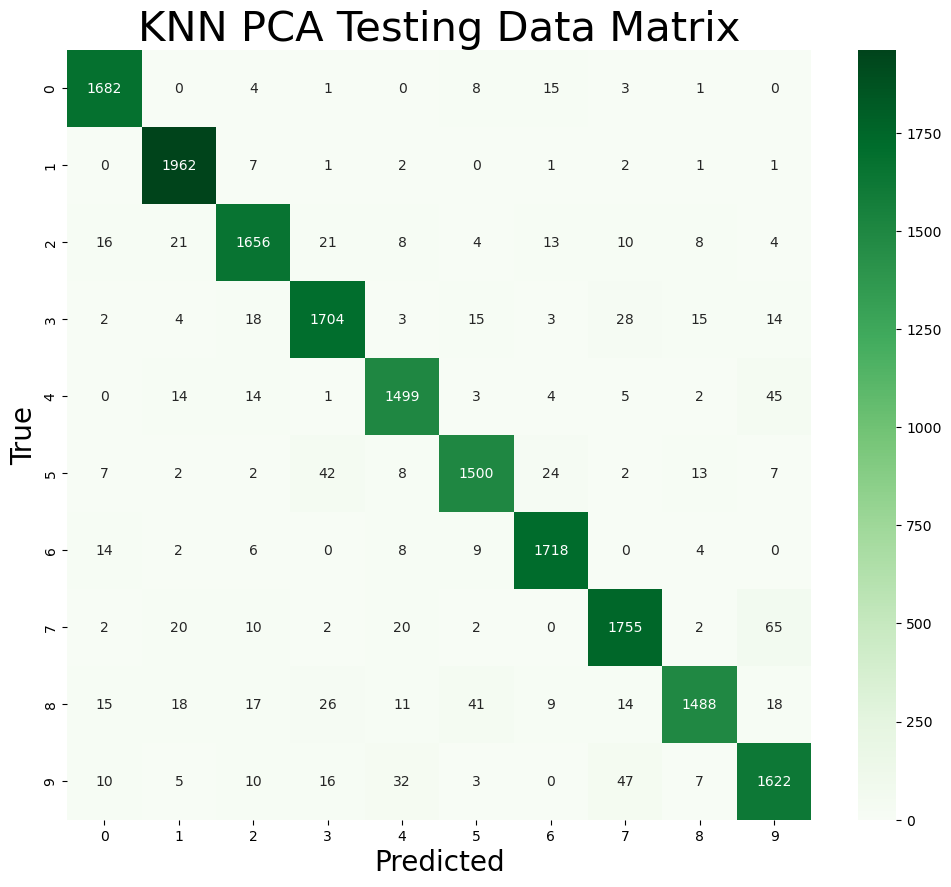

In [16]:
cm = confusion_matrix(y_test, knn_pca_test_predictions)


plt.figure(figsize = (12, 10))
heatmap(cm, annot = True,cmap ='Greens', fmt = 'g')
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('True', fontsize = 20)
plt.title('KNN PCA Testing Data Matrix', fontsize = 30)
plt.show()

In [17]:
#Metrics
print('KNN Training Data Metrics:\n', classification_report(y_train, knn_train_predictions))
print('')
print('KNN Testing Data Metrics:\n', classification_report(y_test, knn_test_predictions))

KNN Training Data Metrics:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5189
           1       0.96      0.99      0.98      5900
           2       0.96      0.96      0.96      5229
           3       0.95      0.97      0.96      5335
           4       0.97      0.95      0.96      5237
           5       0.95      0.95      0.95      4706
           6       0.97      0.98      0.98      5115
           7       0.96      0.96      0.96      5415
           8       0.98      0.92      0.95      5168
           9       0.94      0.95      0.95      5206

    accuracy                           0.96     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.96      0.96      0.96     52500


KNN Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.95      0.99      0.97      1977
           2       0.9

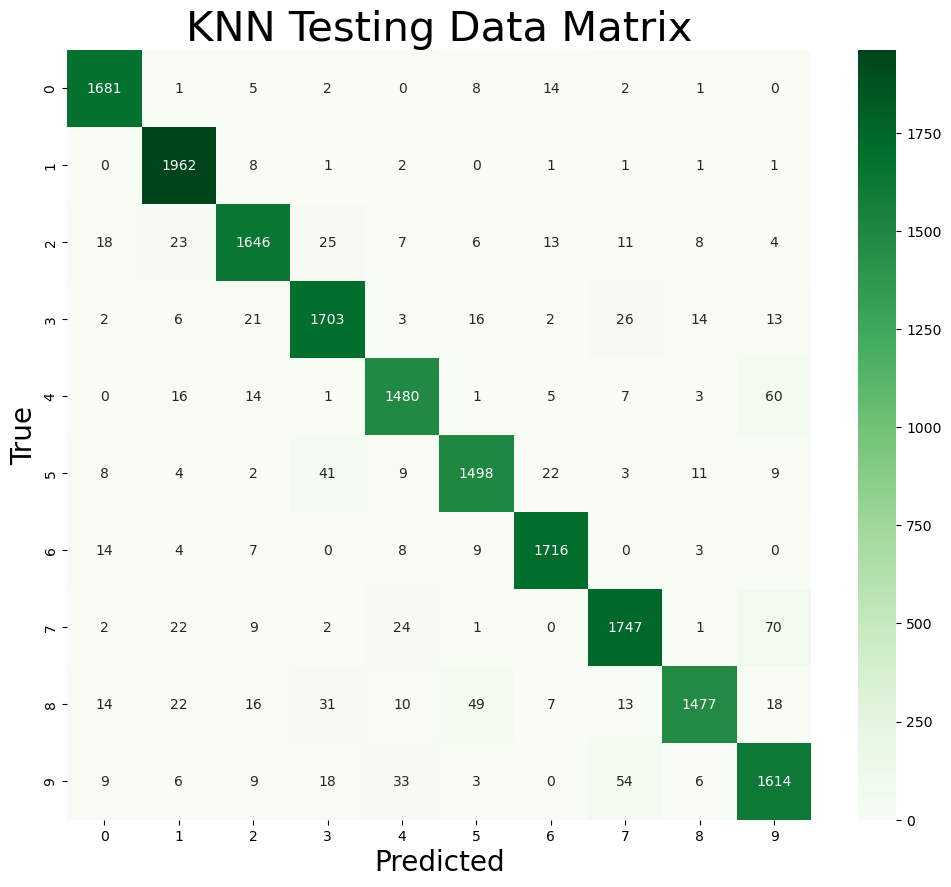

In [18]:
cm = confusion_matrix(y_test, knn_test_predictions)


plt.figure(figsize = (12, 10))
heatmap(cm, annot = True,cmap ='Greens', fmt = 'g')
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('True', fontsize = 20)
plt.title('KNN Testing Data Matrix', fontsize = 30)
plt.show()

The PCA infused Model is faster and showed an accuracy of 97%. The standard KNN Model took longer to run and had an accuracy of 94%. This shows that there is a lot of value in using the PCA in you model because it makes it more accurate and uses runs faster.